### This Jupiter notebook is used for further implementation of the experiment tracking system.

In [1]:
# %pip install comet_ml

  Obtaining dependency information for comet_ml from https://files.pythonhosted.org/packages/4b/94/2e0613eea7af4476265d8a164e929bc46dd4adb7019ddad4e15b015d8438/comet_ml-3.35.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/957.4 kB ? eta -:--:--
     -- ------------------------------------ 61.4/957.4 kB 3.4 MB/s eta 0:00:01
     ------------------------------------- 957.4/957.4 kB 15.3 MB/s eta 0:00:00
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Obtaining dependency information for sentry-sdk>=1.1.0 from https://files.pythonhosted.org/packages/56/f7/d1d459caa0468217ab2638112c5ab31cde516aa3986f2ca292661644e6b8/sentry_sdk-1.34.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/b6/8e/3e12d122dfdf549a8d12eaf39954ee39f2027060aa38b63430f8ab3244e7/simplejson-3.19.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dulwich!=0.20.33,>=0.20.6 

In [10]:
from comet_ml import Experiment
import numpy as np
import os
import sys


DATA_PATH = '../../IFT6758_Data/'
PROJECT_PATH = '../../Milestone2/'


sys.path.append(PROJECT_PATH)
from features.tidy_data import tidy_data
from visualizations.simple_visualization import *

Create your own 'COMET_API_KEY.txt' file, write and save your own API Key, do not push the 'COMET_API_KEY.txt' file to the Github repository.

In [2]:
with open('COMET_API_KEY.txt', 'r') as f:
    my_key = f.read()

# print(my_key)

In [3]:
experiment = Experiment(
  api_key=my_key,
  project_name="nhl-project-b10",
  workspace="ift6758b-project-b10"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/ift6758b-project-b10/nhl-project-b10/dbdc14de56a54fa0b7af60e41f7ad724



### Example for tracking a dataframe

In [4]:
df = tidy_data(DATA_PATH, 2017, 'regular', 2017020273)
df.head()

,game_id,homeTeam,awayTeam,periodType,period,periodTime,team,eventType,x_coordinate,y_coordinate,goal_location,shooter,goalie,shotType,emptyNet,strength
0,2017020273,EDM,VGK,REGULAR,1,03:49,EDM,Shot,86.0,15.0,Left,Darnell Nurse,Maxime Lagace,Wrist Shot,None,None
1,2017020273,EDM,VGK,REGULAR,1,04:40,VGK,Shot,-73.0,23.0,Right,David Perron,Cam Talbot,Wrist Shot,None,None
2,2017020273,EDM,VGK,REGULAR,1,04:51,VGK,Shot,-67.0,-13.0,Right,David Perron,Cam Talbot,Slap Shot,None,None
3,2017020273,EDM,VGK,REGULAR,1,06:28,EDM,Goal,79.0,3.0,Left,Oscar Klefbom,Maxime Lagace,Wrist Shot,False,SHG
4,2017020273,EDM,VGK,REGULAR,1,08:16,EDM,Shot,52.0,-12.0,Left,Adam Larsson,Maxime Lagace,Wrist Shot,None,None


In [5]:
experiment.log_dataframe_profile(
    df, 
    name='test_df',
    dataframe_format='csv' 
)

COMET WARNING: pandas_profiling is required to log profile; ignoring


{'profile': None,
 'dataframe': {'web': 'https://www.comet.com/api/asset/download?assetId=7f29fb731b11445eac4145e11d31cf35&experimentKey=dbdc14de56a54fa0b7af60e41f7ad724',
  'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=7f29fb731b11445eac4145e11d31cf35&experimentKey=dbdc14de56a54fa0b7af60e41f7ad724',
  'assetId': '7f29fb731b11445eac4145e11d31cf35'}}

### Example for tracking a plot

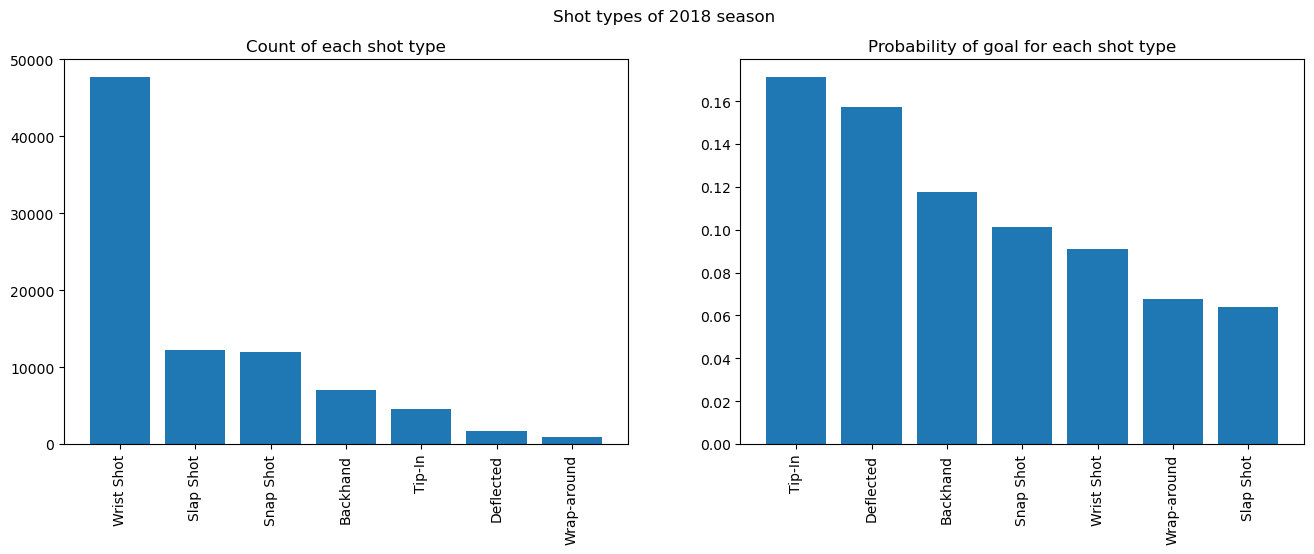

In [17]:
year = 2018
df = year_integration(DATA_PATH, year)
df.reset_index(drop=True, inplace=True)
df_goal = df[df['eventType'] == 'Goal'].reset_index(drop=True)
all_shots = df['shotType'].value_counts()
goaled_shots = df_goal['shotType'].value_counts()
goaled_shots_percentage = goaled_shots / all_shots
goaled_shots_percentage.sort_values(ascending=False, inplace=True)



plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.bar(all_shots.index, all_shots)
plt.xticks(rotation=90)
plt.title('Count of each shot type')
plt.subplot(1, 2, 2)
plt.bar(goaled_shots_percentage.index, goaled_shots_percentage)
plt.xticks(rotation=90)
plt.title('Probability of goal for each shot type')
plt.suptitle('Shot types of {} season'.format(year))
plt.savefig('test.png')
plt.show()

In [15]:
experiment.log_image(
    'test.png', 
    name='test_img'
)

{'web': 'https://www.comet.com/api/image/download?imageId=7a0f49ec73cf495899bd92f612951742&experimentKey=dbdc14de56a54fa0b7af60e41f7ad724',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=7a0f49ec73cf495899bd92f612951742&experimentKey=dbdc14de56a54fa0b7af60e41f7ad724',
 'imageId': '7a0f49ec73cf495899bd92f612951742'}

In [16]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/ift6758b-project-b10/nhl-project-b10/dbdc14de56a54fa0b7af60e41f7ad724
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     dataframe                    : 1 (5.88 KB)
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     images                       : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                

### Example for tracking a model

In [ ]:
# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.5,
    "steps": 100000,
    "batch_size": 50,
}
experiment.log_parameters(hyper_params)

# Or report single hyperparameters:
hidden_layer_size = 50
experiment.log_parameter("hidden_layer_size", hidden_layer_size)

# Long any time-series metrics:
train_accuracy = 3.14
experiment.log_metric("accuracy", train_accuracy, step=0)

# Run your code and go to /

In [ ]:
model = train_model()

# Log the model:
model.save("model.h5")
experiment.log_model("model.h5")